# Big O notation

![](https://imgs.xkcd.com/comics/travelling_salesman_problem.png)

Is there difference between $T_1(N) = N^2 + 800$ and $T_2(N) = 12 * N^2 + 10*N - 4$?

What if I say that computer running $T_2$ is 20 times faster?

## Big O and Omega
<span style="color:red">Informally</span>, $\mathcal{O}(g(x))$ is a set of functions, which are similar in **growth speed**. We write $f(x)\in\mathcal{O}(g(x))$ if $f$ grows "not faster than" $g$. In practice you can also meet $f(x)=\mathcal{O}(g(x))$

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Big-O-notation.png)

Formally, this similarity is expressed in one of following ways:

$\huge f(x)\in\mathcal{O}(g(x)) \stackrel{\text{def}}{\equiv} \exists (C>0), U : \forall (x \in U) \; |f(x)| \leq C|g(x)| $

$U$ is a **deleted neighbourhood** for some $x_0$. If we set $x_0 = \infty$, we will get more intuituve definition (for CS).

$\huge f(x)\in\mathcal{O}(g(x)) \stackrel{\text{def}}{\equiv} \exists (C>0), x_0 : \forall (x > x_0) \; |f(x)| \leq C|g(x)|$

We say $f$ growth is bounded/limited by $g$. $g$ is called **upper bound** for $f$.

There is a friend of $\mathcal{O}$ called $\Omega$.

$\huge f(x)\in\Omega(g(x)) \stackrel{\text{def}}{\equiv} \exists (C>0), x_0 : \forall (x > x_0) \; C|g(x)| \leq |f(x)|$

Here $g$ becomes a lower bound for $f$.

## Prove that $f(x)\in\mathcal{O}(g(x)) \implies g(x) \in \Omega(f(x))$
By definition:

$\large \exists (C>0), x_0 : \forall (x > x_0) \; |f(x)| \leq C|g(x)|$

...


## Big O magic
### Equivalence

$\large f(x)\in O(g(x))\land f(x)\in\Omega(g(x)) \stackrel{def}{\equiv} f(x)\in\Theta(g(x))$

### Transitivity

${\displaystyle {\begin{matrix}f(n)=\Theta (g(n))\land g(n)=\Theta (h(n))&\implies &f(n)=\Theta (h(n))\\f(n)=O(g(n))\land g(n)=O(h(n))&\implies &f(n)=O(h(n))\\f(n)=\Omega (g(n))\land g(n)=\Omega (h(n))&\implies &f(n)=\Omega (h(n))\end{matrix}}}$

### Domination

![](https://miro.medium.com/max/1760/1*Z7wUbhuon-7y2yJkWHXY3Q.png)

Considering that:
$x\in O(x), x\in O(x^2), x^2\in O(x^2), x^2\in O(e^x), ...$

in general:

$O(x) \subset O(x^2) \subset O(e^x)$

We can state, that:

$x^3 + x^2 \in O(x^3)$

because

$ x^2 < x^3 \implies x^2 \in O(x^3)$

### Estimate complexity of all following functions using O(n) notation

In [1]:
def a(x):
    s = 0                          #
    for i in range(x):             #
        s += i                     #
    return s                       #

def b(x):
    s = 0                          #
    for i in range(x):             #
        for j in range(i):         #
            s += i * j             #
    return s                       #
    
def c(x):
    return a(x) + b(x)             #

def d(x):
    return a(x) * b(x)             #

def e(x):
    return a(b(x))                 #

def f(x):
    return f(x) * b(x)             #

def g(x):
    if x > 0:                      #
        return f(x-1) * a(x)       #
    else:                          #
        return 1                   #

### Interesting case

In [9]:
def csort(A):
    mina = min(A)                    #
    k = max(A) - mina + 1            #
    C = [0] * k                      #
    
    for a in A:                      #
        C[a - mina] += 1             #
    b = 0                            #
    for j, c in enumerate(C):        #
        for i in range(c):           #
            A[b] = j + mina          #
            b += 1                   #
    return A                         #


csort([4, 3, 3, 3, 2, 1])

[1, 2, 3, 3, 3, 4]

### (*) More complicated case ###

$\pi(x)$ - how many prime numbers that are less or equal to $x$.

$\pi(x) = li(x) + O(\sqrt{x}*ln(x))$, where $li(x) = \int_0^x\frac{dt}{ln(t)}$

For large $x$ function $\pi(x)$ is close to $\frac{x}{ln(x)}$: $\lim_{x\rightarrow+\infty}\frac{\pi(x)}{x/ln(x)}=1$.

In [6]:
def primes(n):
    lst = [2]                              #  
    for i in range(3, n + 1, 2):           #  
        if (i > 10) and (i % 10 == 5):     #  
            continue                       #  
        for j in lst:                      #  
            if j * j-1 > i:                #  
                lst.append(i)              #  
                break                      #  
            if (i % j == 0):               #  
                break                      #  
        else:                              #  
            lst.append(i)                  #  
    return lst                             #  

print(primes(20))

[2, 3, 5, 7, 11, 13, 17, 19]


## Amortized analysis

Sometimes worst case is too bad. E.g. `append(x)` method sometime takes too much time.

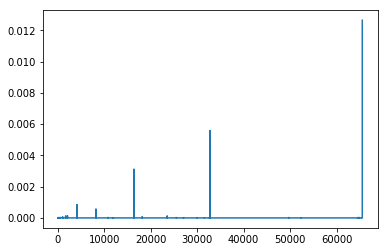

In [19]:
import time 
import matplotlib.pyplot as plt

class L:
    def __init__(self, capacity=16):
        self.data = [0] * capacity
        self.size = 0
    
    def append(self, x):
        s = time.perf_counter()
        if self.size == len(self.data):             #
            d = [0] * self.size * 2                 #
            for i, v in enumerate(self.data):       #
                d[i] = v                            #
            self.data = d                           #
        self.data[self.size] = x                    #
        self.size += 1                              #
        f = time.perf_counter()                     #
        return f - s                                #

t = []
l = L()
for i in range(2 ** 16 + 1):
    t.append(l.append(t))

plt.plot(t)
plt.show()

Yes, single insertion can lead to linear complexity, but for any **N sequential operations** we will need linear time in total too. Thus, **amortized compexity** on N insertions will be $O_A(1)$ per operation. How to show it? There few methods:

### Aggegate analysis

$\large T(N) = \sum_{i=1}^{N}1+\sum_{i=4}^{\lfloor log(N)\rfloor}2^i=N + (16 + 32 + 64 + ... + 2^{\lfloor log(N)\rfloor})=$


$\large N + 16 * (2^{\lfloor log(N)\rfloor - 3} - 1) / (2 - 1)= N + 16 * 2^{\lfloor log(N)\rfloor - 3} - 48 = $


$\large N + 2 * 2^{\lfloor log(N)\rfloor} - 48 \leq N + 2 * 2^{log(N)} - 48 = N + 2N - 48 = 3N-48\in\mathcal{O}(N)$


$\large T_A(N) = \frac{T(N)}{N} \in\mathcal{O}_A(1)$

### Accounting method

For each insertion with no resize we will pay "2 coins". One per operation, one as a fund for credit for future operation. When resize comes, it takes N coins from as credit. We just need to be sure balance is positive, and max balance represents upper bound.


## Problem

What is the amortized cost for such a summator?

In [41]:
def increment(number):
    if number == "":
        return '1'
    
    if number[-1] < '9':
        return number[:-1] + str(int(number[-1]) + 1)
    else:
        return increment(number[:-1]) + '0'
    
print(increment('0'))
print(increment('999'))


1
1000


## P = NP

![](https://imgs.xkcd.com/comics/np_complete.png)

### Consider this picture

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/P_np_np-complete_np-hard.svg/1920px-P_np_np-complete_np-hard.svg.png)


**P (deterministic polynomial time)** - it contains all decision problems that can be solved by a deterministic Turing machine using a polynomial amount of computation time, or polynomial time.

**NP (nondeterministic polynomial time)** - is the set of decision problems for which the problem instances, where the answer is "yes", have proofs verifiable in *polynomial time by a deterministic Turing machine*. OR problems solvable in polynomial time by a non-deterministic Turing machine (can go in both `if` branches).
- Travelling salesman (determine if there is a route visiting all cities with total distance less than *k*)
- The boolean satisfiability problem (SAT)

**NP-complete** - some yes/no problem, which we can get in polynomial task from any NP problem. Some basic problems of NP that is easy to analyse: [Karp's list](https://en.wikipedia.org/wiki/Karp%27s_21_NP-complete_problems)

**NP-hard** - at least as hard as the hardest problems in NP. Hanoi towers are NPH, but not NP.